In [1]:
!pip install -U nltk

In [2]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [ ]:
dir(nltk)

In [64]:
from nltk.corpus import stopwords

stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [2]:
rawData = open("SMSSpamCollection.tsv").read()

In [5]:
rawData[0:500]

"ham\tI've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tNah I don't think he goes to usf, he lives around here though\nham\tEven my brother is not like to speak with me. They treat me like aid"

In [11]:
# replace words
parsedData = rawData.replace('\t', '\n').split('\n')
parsedData[0:5]

['ham',
 "I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.",
 'spam',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham']

In [7]:
# differentiate ham and spam and text
labelList = parsedData[0::2]
testList = parsedData[1::2]

In [8]:
print(labelList[0:5])
print(testList[0:5])

['ham', 'spam', 'ham', 'ham', 'ham']
["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.", "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", "Nah I don't think he goes to usf, he lives around here though", 'Even my brother is not like to speak with me. They treat me like aids patent.', 'I HAVE A DATE ON SUNDAY WITH WILL!!']


In [15]:
print(len(labelList))
print(len(testList))

5571
5570


In [16]:
print(labelList[-5:])

['ham', 'ham', 'ham', 'ham', '']


In [17]:
import pandas as pd

fullcorpus = pd.DataFrame({
    'label': labelList[:-1],
    'body_list': testList
})

In [18]:
fullcorpus.head()

,label,body_list
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [20]:
dataset = pd.read_csv("SMSSpamCollection.tsv", sep="\t", header=None)
dataset.head()

,0,1
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [21]:
fullcorpus.columns = ['label', 'body_text']
fullcorpus.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [25]:
# Explore Dataset

print("Input data has {} rows and {} columns".format(len(fullcorpus), len(fullcorpus.columns)))

Input data has 5570 rows and 2 columns


In [26]:
print("Out of {} row, {} are spam, {} are ham".format(len(fullcorpus), 
                                                      len(fullcorpus[fullcorpus['label']=='spam']),
                                                      len(fullcorpus[fullcorpus['label']=='ham'])))

Out of 5570 row, 746 are spam, 4824 are ham


In [27]:
# missing data is 
print("Number of null in label: {}".format(fullcorpus['label'].isnull().sum()))
print("Number of null in label: {}".format(fullcorpus['body_text'].isnull().sum()))

Number of null in label: 0
Number of null in label: 0


In [28]:
# Regex or regular expression - search pattern
import re

re_test = 'This is a made up string to test 2 different regex methods'
re_test_messy = 'This      is a made up     string to test 2     different regex methods'
re_test_messyly = 'This-is-a/made/up.string*to>>>>>test----2""""""different-regexmethods'

In [31]:
#looking for single white space
re.split('\s', re_test)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [32]:
#looking for white space
re.split('\s+', re_test_messy)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [33]:
# Looking for non word characters to split
re.split('\W+',re_test_messyly)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regexmethods']

In [36]:
re.findall('\S+',re_test_messy)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [37]:
re.findall('\w+',re_test_messyly)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regexmethods']

In [41]:
# Replacing a specific string
pep8_test = 'I try to Follow PEP8 guidelines'
pep7_test = 'I try to follow PEP7 guidelines'
peep8_test = 'I try to follow PEEP8 guidelines'

In [42]:
#Looking for lower case

re.findall('[a-z]+', pep8_test)

['try', 'to', 'ollow', 'guidelines']

In [43]:
#Looking for upper case

re.findall('[A-Z]+', pep8_test)

['I', 'F', 'PEP']

In [45]:
re.findall('[A-Z]+[0-9]+', peep8_test)

['PEEP8']

In [48]:
re.sub('[A-Z]+[0-9]+', 'PEP8 Python Styleguide', pep7_test)

'I try to follow PEP8 Python Styleguide guidelines'

In [50]:
pd.set_option('display.max_colwidth', 100)
data = pd.read_csv("SMSSpamCollection.tsv", sep="\t", header=None)
data.columns = ['label', 'body_text']
data.head()

,label,body_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [52]:
data_cleaned = pd.read_csv('SMSSpamCollection_cleaned.tsv', sep="\t")
data_cleaned.head()

,label,body_text,body_text_nostop
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,"['ive', 'searching', 'right', 'words', 'thank', 'breather', 'promise', 'wont', 'take', 'help', '..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"['free', 'entry', '2', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005..."
2,ham,"Nah I don't think he goes to usf, he lives around here though","['nah', 'dont', 'think', 'goes', 'usf', 'lives', 'around', 'though']"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"['even', 'brother', 'like', 'speak', 'treat', 'like', 'aids', 'patent']"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"['date', 'sunday']"


In [53]:
# remove punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [59]:
def remove_punctuation(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

data['body_text_clean'] = data['body_text'].apply(lambda x: remove_punctuation(x))

data.head()

,label,body_text,body_text_clean
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL


In [62]:
def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

data['body_text_tokenize'] = data['body_text_clean'].apply(lambda x: tokenize(x.lower()))

data.head()

,label,body_text,body_text_clean,body_text_tokenize
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]"


In [65]:
import nltk

stopword = nltk.corpus.stopwords.words('english')

In [68]:
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]
    return text

data['body_text_nostop'] = data['body_text_tokenize'].apply(lambda x: remove_stopwords(x))

data.head()

,label,body_text,body_text_clean,body_text_tokenize,body_text_nostop
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


<h2>Stemming</h2>

In [71]:
# stemming - porter, snowball, lancaster, regex based stammer

ps = nltk.PorterStemmer()

In [72]:
print(ps.stem('grows'))
print(ps.stem('growing'))
print(ps.stem('grow'))

grow
grow
grow


In [73]:
print(ps.stem('run'))
print(ps.stem('running'))
print(ps.stem('runner'))

run
run
runner


In [74]:
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

data['body_text_stemmed'] = data['body_text_nostop'].apply(lambda x: stemming(x))

data.head()

,label,body_text,body_text_clean,body_text_tokenize,body_text_nostop,body_text_stemmed
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom...","[ive, search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, won..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]"


<h2>Lemmatizing

In [75]:
# lemmatizing

wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()

In [76]:
print(ps.stem('meanness'))
print(ps.stem('meaning'))

mean
mean


In [78]:
print(wn.lemmatize('meanness'))
print(wn.lemmatize('meaning'))

meanness
meaning


In [80]:
print(ps.stem('goose'))
print(ps.stem('geese'))

goos
gees


In [81]:
print(wn.lemmatize('goose'))
print(wn.lemmatize('geese'))

goose
goose


In [83]:
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

data['body_text_lemmatized'] = data['body_text_nostop'].apply(lambda x: lemmatizing(x))
data.head()

,label,body_text,body_text_clean,body_text_tokenize,body_text_nostop,body_text_stemmed,body_text_lemmatized
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom...","[ive, search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, won...","[ive, searching, right, word, thank, breather, promise, wont, take, help, granted, fulfil, promi..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]","[nah, dont, think, go, usf, life, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]","[even, brother, like, speak, treat, like, aid, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]","[date, sunday]"


<h2> Vectorizing
    
    <h3> Count Vectorizing

In [84]:
stopwords = nltk.corpus.stopwords.words('english')

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split("\W+", text)
    text = [word for word in tokens if word not in stopwords]
    return text

In [87]:
# vectorizing - count vectorization, N-grams, Term Frequency - inverse document freequency (TF-IDF)

# count vectorization
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer=clean_text)
X_counts = count_vect.fit_transform(data["body_text"])
print(X_counts.shape)
#print(count_vect.get_feature_names())

(5568, 9443)


In [95]:
# apply count vect to smaller sample

data_sample= data[0:20]

count_vect_sample = CountVectorizer(analyzer=clean_text)
X_counts_sample = count_vect_sample.fit_transform(data_sample['body_text'])
print(X_counts_sample.shape)
# print(count_vect_sample.get_feature_names())

(20, 204)


In [97]:
# sparse matrix - store non zero element
X_counts_sample

<20x204 sparse matrix of type '<class 'numpy.int64'>'
	with 229 stored elements in Compressed Sparse Row format>

In [98]:
X_counts_sample.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [103]:
X_counts_df = pd.DataFrame(X_counts_sample.toarray())
X_counts_df.head()

,0,1,2,3,4,5,6,7,8,9,...,194,195,196,197,198,199,200,201,202,203
0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
X_counts_df.columns = count_vect_sample.get_feature_names()
X_counts_df.head()

,08002986030,08452810075over18s,09061701461,1,100,100000,11,12,150pday,16,...,wkly,wonderful,wont,word,words,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,yes,ü
0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h3> N-grams

In [107]:
# N-Grams - two words or three words joining uniquely
stopwords = nltk.corpus.stopwords.words('english')

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split("\W+", text)
    text = " ".join([ps.stem(word) for word in tokens if word not in stopwords])
    return text

data['cleaned_text'] = data['body_text'].apply(lambda x: clean_text(x))
data.head(2)

,label,body_text,body_text_clean,body_text_tokenize,body_text_nostop,body_text_stemmed,body_text_lemmatized,cleaned_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom...","[ive, search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, won...","[ive, searching, right, word, thank, breather, promise, wont, take, help, granted, fulfil, promi...",ive search right word thank breather promis wont take help grant fulfil promis wonder bless time
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...",free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd...


In [109]:
from sklearn.feature_extraction.text import CountVectorizer

n_gram_vect = CountVectorizer(ngram_range=(2,2))
X_counts = n_gram_vect.fit_transform(data['cleaned_text'])
print(X_counts.shape)

(5568, 31275)


In [111]:
# apply count vect n-grams to smaller dataset

data_sample= data[0:20]

ngram_vect_sample = CountVectorizer(ngram_range=(2,2))
X_counts_sample = ngram_vect_sample.fit_transform(data_sample['cleaned_text'])
print(X_counts_sample.shape)
# print(n_gram_vect.get_feature_names())

(20, 209)


In [115]:
x_counts_df = pd.DataFrame(X_counts_sample.toarray())
x_counts_df.columns = ngram_vect_sample.get_feature_names()
x_counts_df.head()

,09061701461 claim,100 20000,100000 prize,11 month,12 hour,150pday 6day,16 tsandc,20000 pound,2005 text,21st may,...,win fa,winner valu,wkli comp,wonder bless,wont take,word claim,word thank,wwwdbuknet lccltd,xxxmobilemovieclub use,ye naughti
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,1,...,1,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h3> TH-IDF

In [116]:
stopwords = nltk.corpus.stopwords.words('english')

def clean_text_THIDF(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split("\W+", text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [118]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vector = TfidfVectorizer(analyzer=clean_text_THIDF)
X_tfidf = tfidf_vector.fit_transform(data['body_text'])
print(X_tfidf.shape)
# print(tfidf_vector.get_feature_names())

(5568, 8107)


In [120]:
data_sample = data[0:20]

tfidf_vect_sample = TfidfVectorizer(analyzer=clean_text_THIDF)
X_tfidf_sample =tfidf_vect_sample.fit_transform(data_sample['body_text'])
print(X_tfidf_sample.shape)

(20, 201)


In [122]:
X_tfidf_df = pd.DataFrame(X_tfidf_sample.toarray())
X_tfidf_df.columns = tfidf_vect_sample.get_feature_names()
X_tfidf_df.head()

,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,16,...,winner,wkli,wonder,wont,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,ü
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.238737,0.238737,0.209853,0.0,0.0,0.0,0.0,0.0
1,0.0,0.198986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.198986,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


<h1> Feature Engineering

In [123]:
data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data.head()

,label,body_text,body_text_clean,body_text_tokenize,body_text_nostop,body_text_stemmed,body_text_lemmatized,cleaned_text,body_len
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom...","[ive, search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, won...","[ive, searching, right, word, thank, breather, promise, wont, take, help, granted, fulfil, promi...",ive search right word thank breather promis wont take help grant fulfil promis wonder bless time,160
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...",free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd...,128
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]","[nah, dont, think, go, usf, life, around, though]",nah dont think goe usf live around though,49
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]","[even, brother, like, speak, treat, like, aid, patent]",even brother like speak treat like aid patent,62
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]","[date, sunday]",date sunday,28


In [126]:
import string

def count_punc(text):
    count = sum([1 for char in text  if char in string.punctuation])
    return round(count/(len(text)-text.count(" ")), 3) * 100

data['punch%'] = data["body_text"].apply(lambda x: count_punc(x))
data.head()

,label,body_text,body_text_clean,body_text_tokenize,body_text_nostop,body_text_stemmed,body_text_lemmatized,cleaned_text,body_len,punch,punch%
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom...","[ive, search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, won...","[ive, searching, right, word, thank, breather, promise, wont, take, help, granted, fulfil, promi...",ive search right word thank breather promis wont take help grant fulfil promis wonder bless time,160,2.5,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...",free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd...,128,4.7,4.7
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]","[nah, dont, think, go, usf, life, around, though]",nah dont think goe usf live around though,49,4.1,4.1
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]","[even, brother, like, speak, treat, like, aid, patent]",even brother like speak treat like aid patent,62,3.2,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]","[date, sunday]",date sunday,28,7.1,7.1


In [129]:
from matplotlib import pyplot as plt
import numpy as np

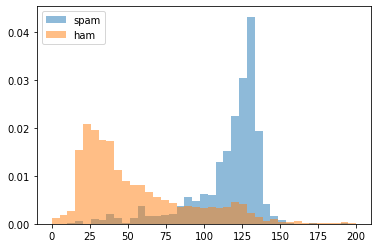

In [136]:
bins = np.linspace(0, 200, 40)

plt.hist(data[data['label']=='spam']['body_len'], bins=bins, density=True, alpha=0.5, label='spam')
plt.hist(data[data['label']=='ham']['body_len'], bins=bins, alpha=0.5, density=True, label='ham')
plt.legend(loc='upper left')
plt.show()

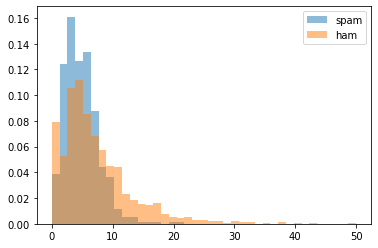

In [137]:
bins = np.linspace(0, 50, 40)

plt.hist(data[data['label']=='spam']['punch%'], bins=bins, alpha=0.5,density=True, label='spam')
plt.hist(data[data['label']=='ham']['punch%'], bins=bins, alpha=0.5,density=True, label='ham')
plt.legend(loc='upper right')
plt.show()

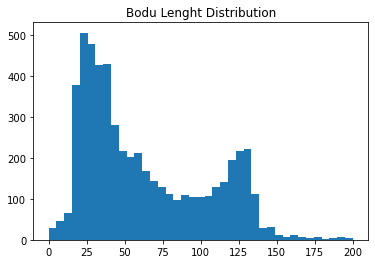

In [139]:
bins = np.linspace(0, 200, 40)

plt.hist(data['body_len'], bins=bins)
plt.title('Bodu Lenght Distribution')
plt.show()

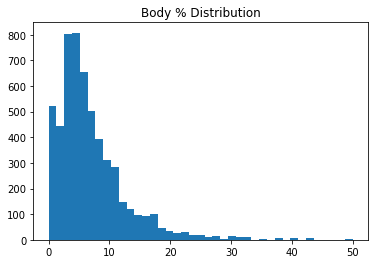

In [141]:
bins = np.linspace(0, 50, 40)

plt.hist(data['punch%'], bins=bins)
plt.title('Body % Distribution')
plt.show()

<h1> Box Cox Power Transformation

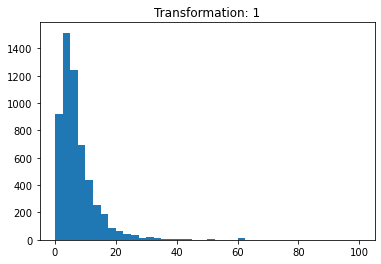

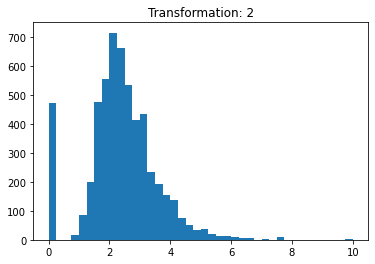

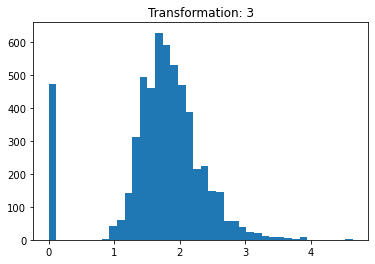

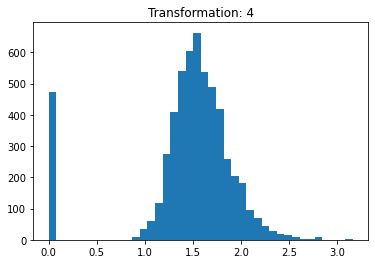

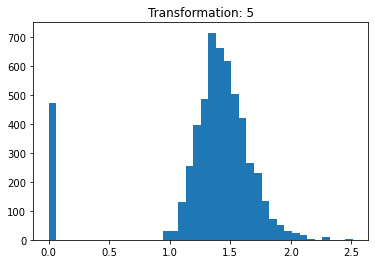

In [142]:
for i in [1,2,3,4,5]:
    plt.hist((data['punch%'] ** (1/i)), bins=40)
    plt.title("Transformation: {}".format(str(i)))
    plt.show()

In [148]:
X_features = pd.concat([data['body_len'], data['punch%'], pd.DataFrame(X_counts.toarray())], axis=1)
X_features.head()

,body_len,punch%,0,1,2,3,4,5,6,7,...,8097,8098,8099,8100,8101,8102,8103,8104,8105,8106
0,160,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [143]:
from sklearn.ensemble import RandomForestClassifier

print(dir(RandomForestClassifier))

['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_n_features', '_estimator_type', '_get_param_names', '_get_tags', '_make_estimator', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_required_parameters', '_set_oob_score', '_validate_X_predict', '_validate_data', '_validate_estimator', '_validate_y_class_weight', 'apply', 'decision_path', 'feature_importances_', 'fit', 'get_params', 'predict', 'predict_log_proba', 'predict_proba', 'score', 'set_params']


In [146]:
rf = RandomForestClassifier(n_jobs=-1, n_estimators=10)

In [145]:
from sklearn.model_selection import KFold,cross_val_score

In [149]:
k_fold = KFold(n_splits=5)
cross_val_score(rf, X_features, data['label'], cv=k_fold, scoring='accuracy', n_jobs=-1)

array([0.96588869, 0.97037702, 0.96947935, 0.95956873, 0.94968553])

In [150]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X_features, data['label'], test_size=0.2)

In [152]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4454, 8109)
(1114, 8109)
(4454,)
(1114,)


In [153]:
rf = RandomForestClassifier(n_estimators=50, max_depth=20,n_jobs=-1)
rf_model = rf.fit(X_train, y_train)

In [155]:
sorted(zip(rf_model.feature_importances_, X_train.columns), reverse=True)[0:10]

[(0.035762878745974294, 1804),
 (0.033352806919512666, 4799),
 (0.032484149629090874, 'body_len'),
 (0.03168986962734375, 7353),
 (0.0262107024472812, 5727),
 (0.024361486432388942, 2032),
 (0.018363554302103187, 6288),
 (0.017604380931439546, 7030),
 (0.017380259765611285, 3135),
 (0.017308042946214568, 6749)]

In [156]:
y_pred = rf_model.predict(X_test)
precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')

In [165]:
print('Precision: {} '.format(round(precision, 3)))
print('Recall: {} '.format(round(recall, 3)))
print('Accuracy: {} '.format(round((y_pred==y_test).sum()/len(y_pred),3)))

Precision: 1.0 
Recall: 0.574 
Accuracy: 0.948 


In [166]:
def train_RF(n_est, depth):
    rf = RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    rf_model = rf.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')
    print('Est: {} / Depth: {} / ----- Precision: {} / Recall: {} / Accuaracy: {}'.format(n_est,
                                                                                          depth,
                                                                                          round(precision, 3),
                                                                                         round(recall, 3),
                                                                                         round((y_pred==y_test).sum() / len(y_pred), 3)))

In [167]:
for n_est in [10,50,100]:
    for depth in [10, 20, 30, None]:
        train_RF(n_est, depth)

Est: 10 / Depth: 10 / ----- Precision: 1.0 / Recall: 0.309 / Accuaracy: 0.916
Est: 10 / Depth: 20 / ----- Precision: 1.0 / Recall: 0.603 / Accuaracy: 0.952
Est: 10 / Depth: 30 / ----- Precision: 1.0 / Recall: 0.706 / Accuaracy: 0.964
Est: 10 / Depth: None / ----- Precision: 1.0 / Recall: 0.816 / Accuaracy: 0.978
Est: 50 / Depth: 10 / ----- Precision: 1.0 / Recall: 0.324 / Accuaracy: 0.917
Est: 50 / Depth: 20 / ----- Precision: 1.0 / Recall: 0.566 / Accuaracy: 0.947
Est: 50 / Depth: 30 / ----- Precision: 1.0 / Recall: 0.721 / Accuaracy: 0.966
Est: 50 / Depth: None / ----- Precision: 1.0 / Recall: 0.846 / Accuaracy: 0.981
Est: 100 / Depth: 10 / ----- Precision: 1.0 / Recall: 0.265 / Accuaracy: 0.91
Est: 100 / Depth: 20 / ----- Precision: 1.0 / Recall: 0.618 / Accuaracy: 0.953
Est: 100 / Depth: 30 / ----- Precision: 1.0 / Recall: 0.721 / Accuaracy: 0.966
Est: 100 / Depth: None / ----- Precision: 1.0 / Recall: 0.846 / Accuaracy: 0.981


In [169]:
# Evaluate random forest model
X_tfidf_feat = pd.concat([data['body_len'], data['punch%'], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_tfidf_feat.head()

,body_len,punch%,0,1,2,3,4,5,6,7,...,8097,8098,8099,8100,8101,8102,8103,8104,8105,8106
0,160,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [170]:
from sklearn.model_selection import GridSearchCV

In [171]:
# TFIDF

rf = RandomForestClassifier()
param = {'n_estimators': [10,150,300],
        'max_depth': [30, 60, 90, None]
        }
gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit=gs.fit(X_tfidf_feat, data['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
10,39.242876,1.131369,0.537769,0.121392,None,150,"{'max_depth': None, 'n_estimators': 150}",0.978456,0.975763,0.974865,0.969452,0.970350,0.973777,0.003390,1
6,3.667590,0.338964,0.241953,0.021636,90,10,"{'max_depth': 90, 'n_estimators': 10}",0.973968,0.978456,0.973968,0.967655,0.973944,0.973598,0.003444,2
8,65.322820,1.211300,0.585969,0.093624,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.979354,0.977558,0.973070,0.966757,0.971249,0.973597,0.004504,3
7,32.849139,1.619186,0.477811,0.063255,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.975763,0.975763,0.973070,0.970350,0.971249,0.973239,0.002239,4
11,67.496882,7.172812,0.652607,0.187349,None,300,"{'max_depth': None, 'n_estimators': 300}",0.977558,0.974865,0.974865,0.967655,0.970350,0.973059,0.003558,5


In [ ]:
# Count Vector

rf = RandomForestClassifier()
param = {'n_estimators': [10,150,300],
        'max_depth': [30, 60, 90, None]
        }
gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit=gs.fit(X_features, data['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

<h1> Gradient Boosting

In [172]:
from sklearn.ensemble import GradientBoostingClassifier

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X_features, data['label'], test_size=0.2)

In [179]:
def train_GB(est, max_depth, lr):
    gb = GradientBoostingClassifier(n_estimators=est, max_depth=max_depth, learning_rate=lr)
    gb_model = gb.fit(X_train, y_train)
    y_pred = gb_model.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')
    print('Est: {} / Depth: {} / LR: {} ----- Precision: {} / Recall: {} / Accuaracy: {}'.format(n_est,
                                                                                          depth,
                                                                                            lr,
                                                                                          round(precision, 3),
                                                                                         round(recall, 3),
                                                                                         round((y_pred==y_test).sum() / len(y_pred), 3)))

In [181]:
for n_est in [10,20,30]:
    for depth in [10, 20, 30, None]:
        for lr in [0.01, 0.1, 1]:
            train_GB(n_est, depth, lr)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Est: 10 / Depth: 10 / LR: 0.01 ----- Precision: 0.0 / Recall: 0.0 / Accuaracy: 0.854
Est: 10 / Depth: 10 / LR: 0.1 ----- Precision: 0.91 / Recall: 0.748 / Accuaracy: 0.952
Est: 10 / Depth: 10 / LR: 1 ----- Precision: 0.857 / Recall: 0.81 / Accuaracy: 0.952


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Est: 10 / Depth: 20 / LR: 0.01 ----- Precision: 0.0 / Recall: 0.0 / Accuaracy: 0.854
Est: 10 / Depth: 20 / LR: 0.1 ----- Precision: 0.902 / Recall: 0.791 / Accuaracy: 0.957
Est: 10 / Depth: 20 / LR: 1 ----- Precision: 0.881 / Recall: 0.816 / Accuaracy: 0.957


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Est: 10 / Depth: 30 / LR: 0.01 ----- Precision: 0.0 / Recall: 0.0 / Accuaracy: 0.854
Est: 10 / Depth: 30 / LR: 0.1 ----- Precision: 0.909 / Recall: 0.798 / Accuaracy: 0.959
Est: 10 / Depth: 30 / LR: 1 ----- Precision: 0.877 / Recall: 0.834 / Accuaracy: 0.959


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Est: 10 / Depth: None / LR: 0.01 ----- Precision: 0.0 / Recall: 0.0 / Accuaracy: 0.854
Est: 10 / Depth: None / LR: 0.1 ----- Precision: 0.89 / Recall: 0.798 / Accuaracy: 0.956
Est: 10 / Depth: None / LR: 1 ----- Precision: 0.882 / Recall: 0.822 / Accuaracy: 0.958


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Est: 20 / Depth: 10 / LR: 0.01 ----- Precision: 0.0 / Recall: 0.0 / Accuaracy: 0.854
Est: 20 / Depth: 10 / LR: 0.1 ----- Precision: 0.915 / Recall: 0.791 / Accuaracy: 0.959
Est: 20 / Depth: 10 / LR: 1 ----- Precision: 0.848 / Recall: 0.785 / Accuaracy: 0.948


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Est: 20 / Depth: 20 / LR: 0.01 ----- Precision: 0.0 / Recall: 0.0 / Accuaracy: 0.854
Est: 20 / Depth: 20 / LR: 0.1 ----- Precision: 0.916 / Recall: 0.804 / Accuaracy: 0.961
Est: 20 / Depth: 20 / LR: 1 ----- Precision: 0.888 / Recall: 0.828 / Accuaracy: 0.96


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Est: 20 / Depth: 30 / LR: 0.01 ----- Precision: 0.0 / Recall: 0.0 / Accuaracy: 0.854
Est: 20 / Depth: 30 / LR: 0.1 ----- Precision: 0.887 / Recall: 0.816 / Accuaracy: 0.958
Est: 20 / Depth: 30 / LR: 1 ----- Precision: 0.902 / Recall: 0.847 / Accuaracy: 0.964


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Est: 20 / Depth: None / LR: 0.01 ----- Precision: 0.0 / Recall: 0.0 / Accuaracy: 0.854
Est: 20 / Depth: None / LR: 0.1 ----- Precision: 0.874 / Recall: 0.81 / Accuaracy: 0.955
Est: 20 / Depth: None / LR: 1 ----- Precision: 0.865 / Recall: 0.828 / Accuaracy: 0.956


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Est: 30 / Depth: 10 / LR: 0.01 ----- Precision: 0.0 / Recall: 0.0 / Accuaracy: 0.854
Est: 30 / Depth: 10 / LR: 0.1 ----- Precision: 0.917 / Recall: 0.81 / Accuaracy: 0.961
Est: 30 / Depth: 10 / LR: 1 ----- Precision: 0.884 / Recall: 0.798 / Accuaracy: 0.955


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Est: 30 / Depth: 20 / LR: 0.01 ----- Precision: 0.0 / Recall: 0.0 / Accuaracy: 0.854
Est: 30 / Depth: 20 / LR: 0.1 ----- Precision: 0.916 / Recall: 0.804 / Accuaracy: 0.961
Est: 30 / Depth: 20 / LR: 1 ----- Precision: 0.9 / Recall: 0.828 / Accuaracy: 0.961


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Est: 30 / Depth: 30 / LR: 0.01 ----- Precision: 0.0 / Recall: 0.0 / Accuaracy: 0.854
Est: 30 / Depth: 30 / LR: 0.1 ----- Precision: 0.892 / Recall: 0.81 / Accuaracy: 0.958
Est: 30 / Depth: 30 / LR: 1 ----- Precision: 0.893 / Recall: 0.822 / Accuaracy: 0.96


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Est: 30 / Depth: None / LR: 0.01 ----- Precision: 0.0 / Recall: 0.0 / Accuaracy: 0.854
Est: 30 / Depth: None / LR: 0.1 ----- Precision: 0.864 / Recall: 0.816 / Accuaracy: 0.954
Est: 30 / Depth: None / LR: 1 ----- Precision: 0.865 / Recall: 0.828 / Accuaracy: 0.956


In [ ]:
# Evaluate
gb = GradientBoostingClassifier()
param = {
    'n_estimators': [100, 150],
    'max_depth': [7, 11, 15],
    'learning_rate': [0.1]
}
gs = GridSearchCV(gb, param, cv=5, n_jobs=-1)
cv_fit = gs.fit(X_tfidf_feat, data['label'])
pd.DataFrame(cv_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

In [ ]:
# Evaluate
gb = GradientBoostingClassifier()
param = {
    'n_estimators': [100, 150],
    'max_depth': [7, 11, 15],
    'learning_rate': [0.1]
}
gs = GridSearchCV(gb, param, cv=5, n_jobs=-1)
cv_fit = gs.fit(X_features, data['label'])
pd.DataFrame(cv_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

<h1> Model Selection
    

In [ ]:
# vectorize text

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf_vect_fit = tfidf_vect.fit(X_train['body_text'])

tfidf_train = tfidf_vect_fit.transform(X_train['body_text'])
tfidf_test = tfidf_vect_fit.transform(X_test['body_text'])

X_train_vect = pd.concat([X_train[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
import time

In [ ]:
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

start = time.time()
rf_model = rf.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rf_model.predict(X_test_vect)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

In [ ]:
gb = GradientBoostingClassifier(n_estimators=150, max_depth=11)

start = time.time()
gb_model = gb.fit(X_train_vect, y_train)
end = time.time()
fiGridSearchCVme = (end - start)

start = time.time()
y_pred = gb_model.predict(X_test_vect)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))